In [ ]:
# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


# **Analise exploratoria**

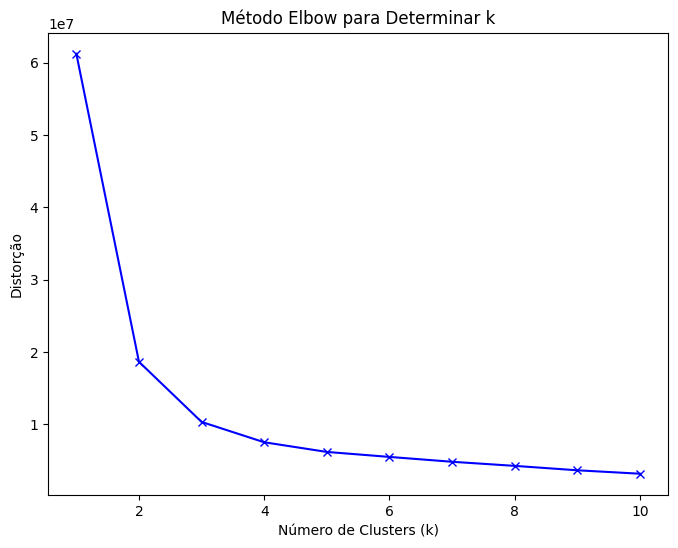

In [ ]:
# Carga de dados
df = pd.read_csv('/content/sample_data/heart_attack_prediction_dataset.csv')
features_for_kmeans = ['Age', 'Cholesterol','Diabetes']

# Inicializando a lista de distorções
distortions = []

# Testando diferentes valores de k
K = range(1, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[features_for_kmeans])
    distortions.append(kmeanModel.inertia_)

# Plotando o gráfico do Método Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distorção')
plt.title('Método Elbow para Determinar k')
plt.show()


***Realização de testes para descobrir o numero Klurters com o maior Silhouette Score***

In [ ]:
# Escolha do número de clusters (k)
chosen_k = 4

# Treinando o modelo com o número escolhido de clusters
kmeanModel = KMeans(n_clusters=chosen_k)
kmeanModel.fit(df[features_for_kmeans])

# Obtendo os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeanModel.labels_

# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels


In [ ]:
# Obtendo os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeanModel.labels_
# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels

In [ ]:
# Calculando o Silhouette Score para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(df[features_for_kmeans], cluster_labels)
print(f"Silhouette Score para {chosen_k} clusters: {silhouette_avg:.2f}")


Silhouette Score para 4 clusters: 0.42


In [ ]:
# Escolha do número de clusters (k)
chosen_k = 3
kmeanModel = KMeans(n_clusters=chosen_k)
kmeanModel.fit(df[features_for_kmeans])
cluster_labels = kmeanModel.labels_
df['Cluster'] = cluster_labels

In [ ]:
# Obtendo os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeanModel.labels_
# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels

In [ ]:
# Calculando o Silhouette Score para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(df[features_for_kmeans], cluster_labels)
print(f"Silhouette Score para {chosen_k} clusters: {silhouette_avg:.2f}")

Silhouette Score para 3 clusters: 0.49


O Silhouette Score mais alto para 3 clusters (0.49) em comparação com 4 clusters (0.43) indica uma melhor separação entre grupos no primeiro caso. Portanto, a escolha de 3 clusters parece mais apropriada para este conjunto de dados.

In [ ]:
print(df.describe())


               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

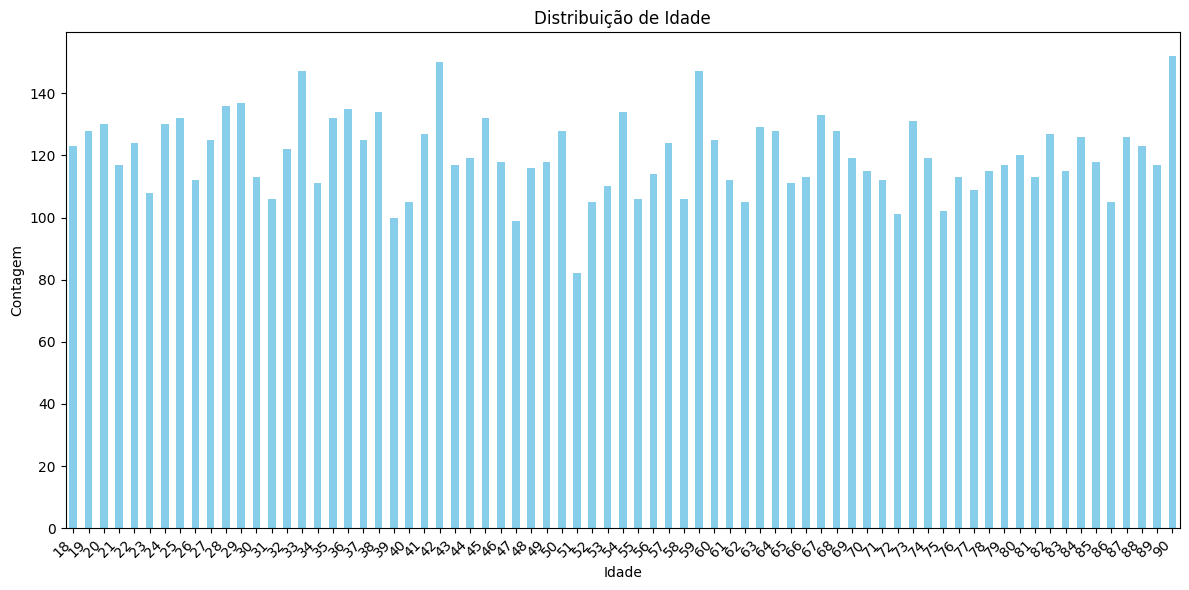

In [ ]:
# Criar gráfico de barras para a coluna 'Age' com rótulos rotacionados
plt.figure(figsize=(12, 6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#O gráfico de barras exibe a distribuição da idade no conjunto de dados, onde cada barra representa uma
#faixa etária e a altura reflete a contagem de pessoas nessa faixa.

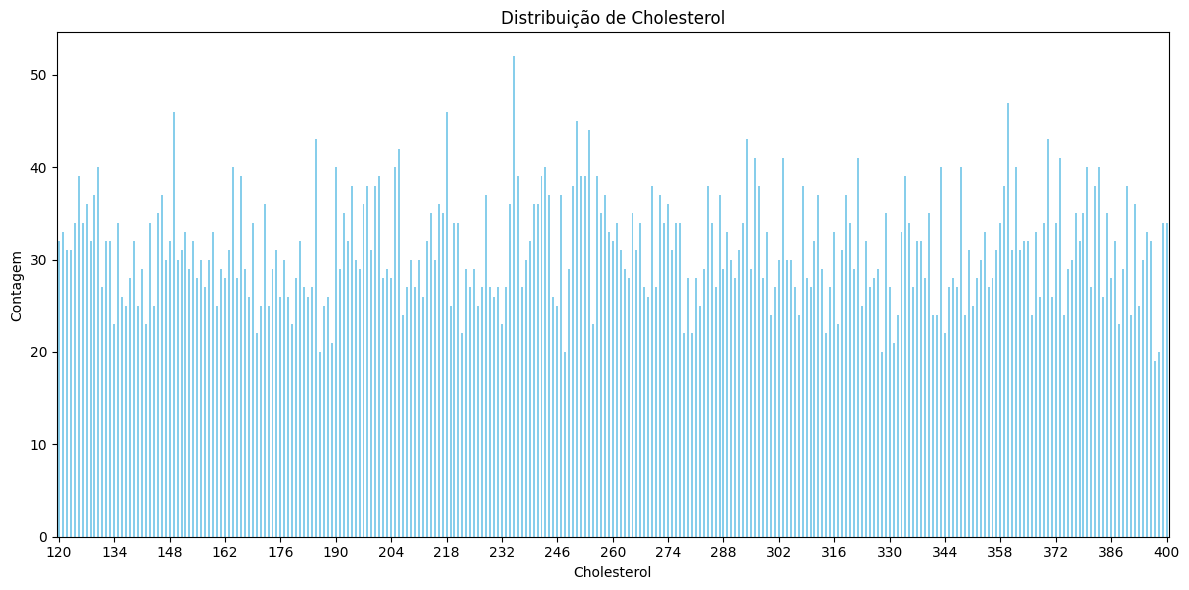

In [ ]:
# Convertendo a coluna 'Cholesterol' para string e criando o gráfico de barras
plt.figure(figsize=(12, 6))
counts = df['Cholesterol'].astype(str).str.lower().value_counts().sort_index()
counts.plot(kind='bar', color='skyblue')

# Ajustar rótulos do eixo x
step = max(1, len(counts) // 20)
plt.xticks(range(0, len(counts), step), counts.index[::step], rotation=0, ha='center')

plt.title('Distribuição de Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

In [ ]:
#O gráfico de barras para colesterol ilustra a distribuição dos níveis dessa variável no conjunto de dados.
#Cada barra representa uma categoria de colesterol, com a altura indicando a quantidade de pessoas associadas

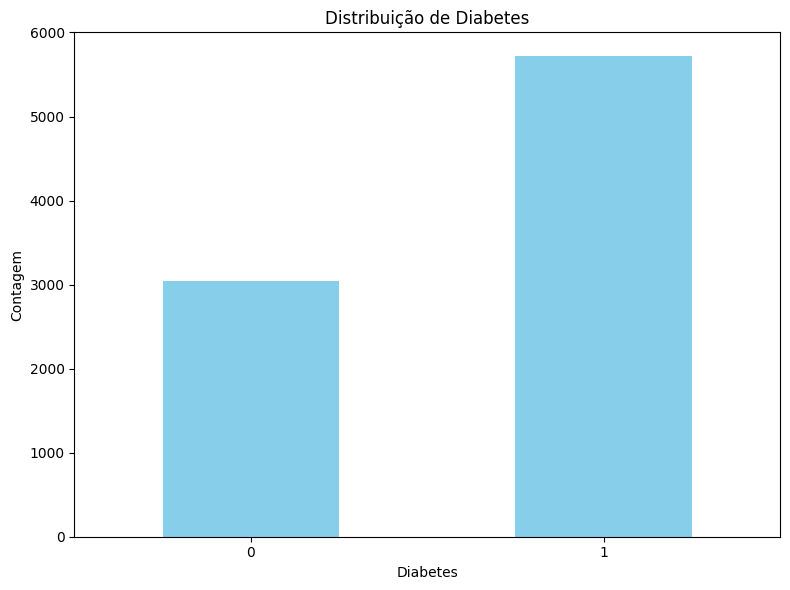

In [ ]:
plt.figure(figsize=(8, 6))
df['Diabetes'].astype(str).str.lower().value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribuição de Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Contagem')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

In [ ]:
#O gráfico de barras mostra a contagem de pessoas com e sem diabetes. Cada barra representa uma categoria ('Sim' ou 'Não')
#e sua altura indica a quantidade de pessoas associadas a cada condição.

# **Utilizando a técnica de redução de dimensionalidade Principal Component Analysis (PCA) e apresentando os resultados**

In [128]:
#Imporatando as devidas Bibliotecas para a realização do PCA
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [129]:
# Criando um dataframe a partir do dados do arquivo
df = pd.read_csv('/content/sample_data/heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [130]:
# Seleção de atributos (Dados de entrada)
# Com o método .iloc selecionamos (por índice) todas as linhas,
# e as colunas de 1 a 13 (o segundo parâmetro é excludente)
X = df.iloc[:, 0:14].values

In [131]:
y = df.iloc[:, 14].values

In [120]:
le_Cholesterol = LabelEncoder()
le_Age = LabelEncoder()
le_Diabetes = LabelEncoder()
le_Smoking = LabelEncoder()
le_Triglycerides = LabelEncoder()

In [121]:
 #realizando a transformação de variáveis categóricas em variáveis numéricas usando o LabelEncoder para algumas
 #colunas específicas do conjunto de dados X
X[:,1] = le_Cholesterol.fit_transform(X[:,1])
X[:,3] = le_Age.fit_transform(X[:,3])
X[:,5] = le_Diabetes.fit_transform(X[:,5])
X[:,6] = le_Smoking.fit_transform(X[:,6])
X[:,7] = le_Triglycerides.fit_transform(X[:,7])


In [122]:
X.shape

(8763, 14)

In [132]:
#divisão do  conjunto de dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20)

In [124]:
X_treino.shape, X_teste.shape

((7010, 14), (1753, 14))

In [136]:
# Criamos a variável pca e aplicamos o algoritmo PCA para a redução do número original de colunas para
# um número definido "p"
# O hiperparâmetro "n_components" recebe o valor definido de novas colunas (p)
# p = 10
p = 8
# pca = PCA(n_components=None)
pca = PCA(n_components=p)